In [1]:
import tidy3d as td
import tidy3d.web as web

import numpy as np
import matplotlib.pyplot as plt

from tidy3d.plugins.mode import ModeSolver

In [2]:
def gaussianProfile(xLim,yLim,sx,sy,a = 1):
    x = np.linspace(xLim[0],xLim[1],1001)
    y = np.linspace(yLim[0],yLim[1],1001)
    X,Y = np.meshgrid(x,y)

    return x,y,a*np.exp(-(Y/sy)**2)*np.exp(-(X/sx)**2)

freq0 = td.C_0/0.630

def getCustomMedium(sizeX,sizeY,sx,sy,n0,deltaN,deltaNimag=0):
    xLim = (-sizeX/2,sizeX/2)
    yLim = (-sizeY/2,sizeY/2)
    x,y,index = gaussianProfile(xLim,yLim,sx,sy,deltaN)
    xImag,yiImag,indexImag = gaussianProfile(xLim,yLim,sx,sy,deltaNimag)
    index += n0

    z = [-10,0,10]

    permittivity = td.SpatialDataArray(np.repeat(index[:,:,np.newaxis],3,axis = 2),coords = dict(x=x,y=y,z=z))
    conductivity = td.SpatialDataArray(np.repeat(indexImag[:,:,np.newaxis],3,axis = 2),coords = dict(x=xImag,y=yiImag,z=z))
    medium = td.CustomMedium(permittivity=permittivity,conductivity=conductivity)
    structure = td.Structure(geometry=td.Box(center = (0,0,0),
                        size = (sizeX,sizeY,10)),
                            medium=medium)
    return structure

structure = getCustomMedium(15,15,sx = 1,sy = 2,n0 = 1.5,deltaN = 0.1,deltaNimag=0)

In [3]:
td.UniformGrid(dl = 0.01)

UniformGrid(attrs={}, type='UniformGrid', dl=0.01)

In [4]:
sim =  td.Simulation(
        grid_spec=td.GridSpec.uniform(dl = 0.01),
        structures=[structure],
        sources=[],
        monitors=[],
        run_time=1e-12,
        size = (8,8,8)
        
    )

<Axes: title={'center': 'cross section at z=0.00 (μm)'}, xlabel='x (μm)', ylabel='y (μm)'>

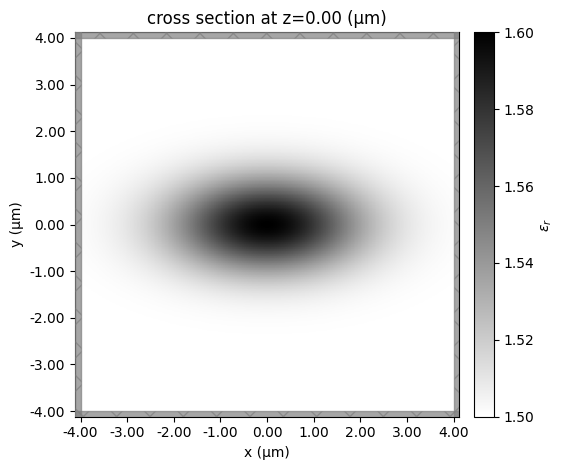

In [5]:
sim.plot_eps(z=0,eps_lim=(1.5,1.6),freq=td.C_0)

<Axes: title={'center': 'cross section at z=0.00 (μm)'}, xlabel='x (μm)', ylabel='y (μm)'>

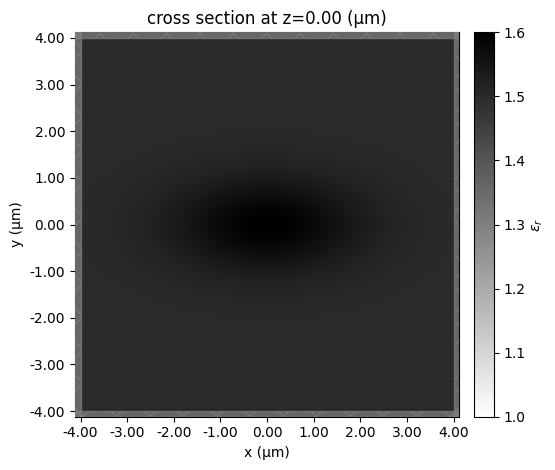

In [6]:
sim.plot_eps(z=0,freq=td.C_0)

<Axes: title={'center': 'cross section at z=0.00 (μm)'}, xlabel='x (μm)', ylabel='y (μm)'>

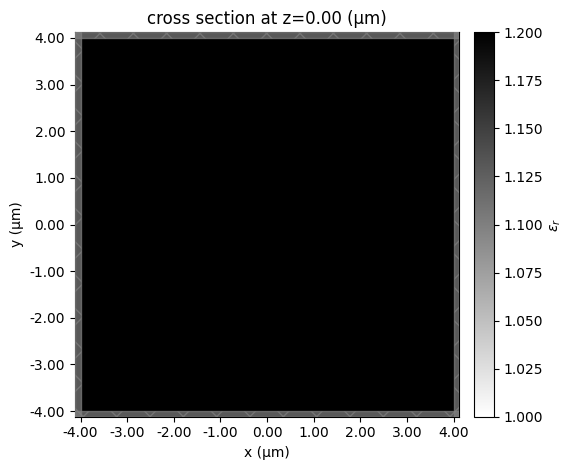

In [13]:
sim.plot_eps(z=0,freq=td.C_0,eps_lim=(None,1.2))